In [3]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn. datasets import make_moons
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split as tt
from sklearn import metrics
from scipy.spatial.distance import cdist

## Making a dataset using make_blobs

In [5]:
X,y=make_blobs(n_samples=1200, centers=6, cluster_std=0.60, random_state=0)

In [9]:
df=[X,y]

In [13]:
print(df)

[array([[-2.26287701,  3.49834995],
       [-1.34190527,  2.09103218],
       [-1.66039022,  2.40253032],
       ...,
       [ 9.33360394, -2.00767286],
       [ 0.37614087,  3.37692467],
       [ 5.6655555 ,  0.22426637]], shape=(1200, 2)), array([2, 2, 2, ..., 4, 0, 5], shape=(1200,))]


In [8]:
x_train,x_test,y_train,y_test=tt(X,y,test_size=0.2,random_state=32)

## Dataset Visualization

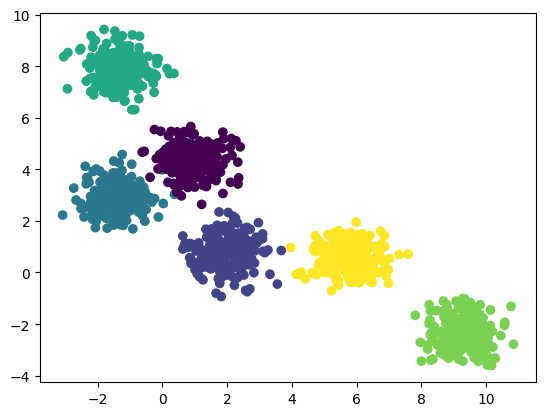

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

## Visualization of K means clustering

C:\Users\Dell\AppData\Local\Temp\ipykernel_12788\3275517608.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', i)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12788\3275517608.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', i)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12788\3275517608.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', i)
C:\Users\Dell\AppDa

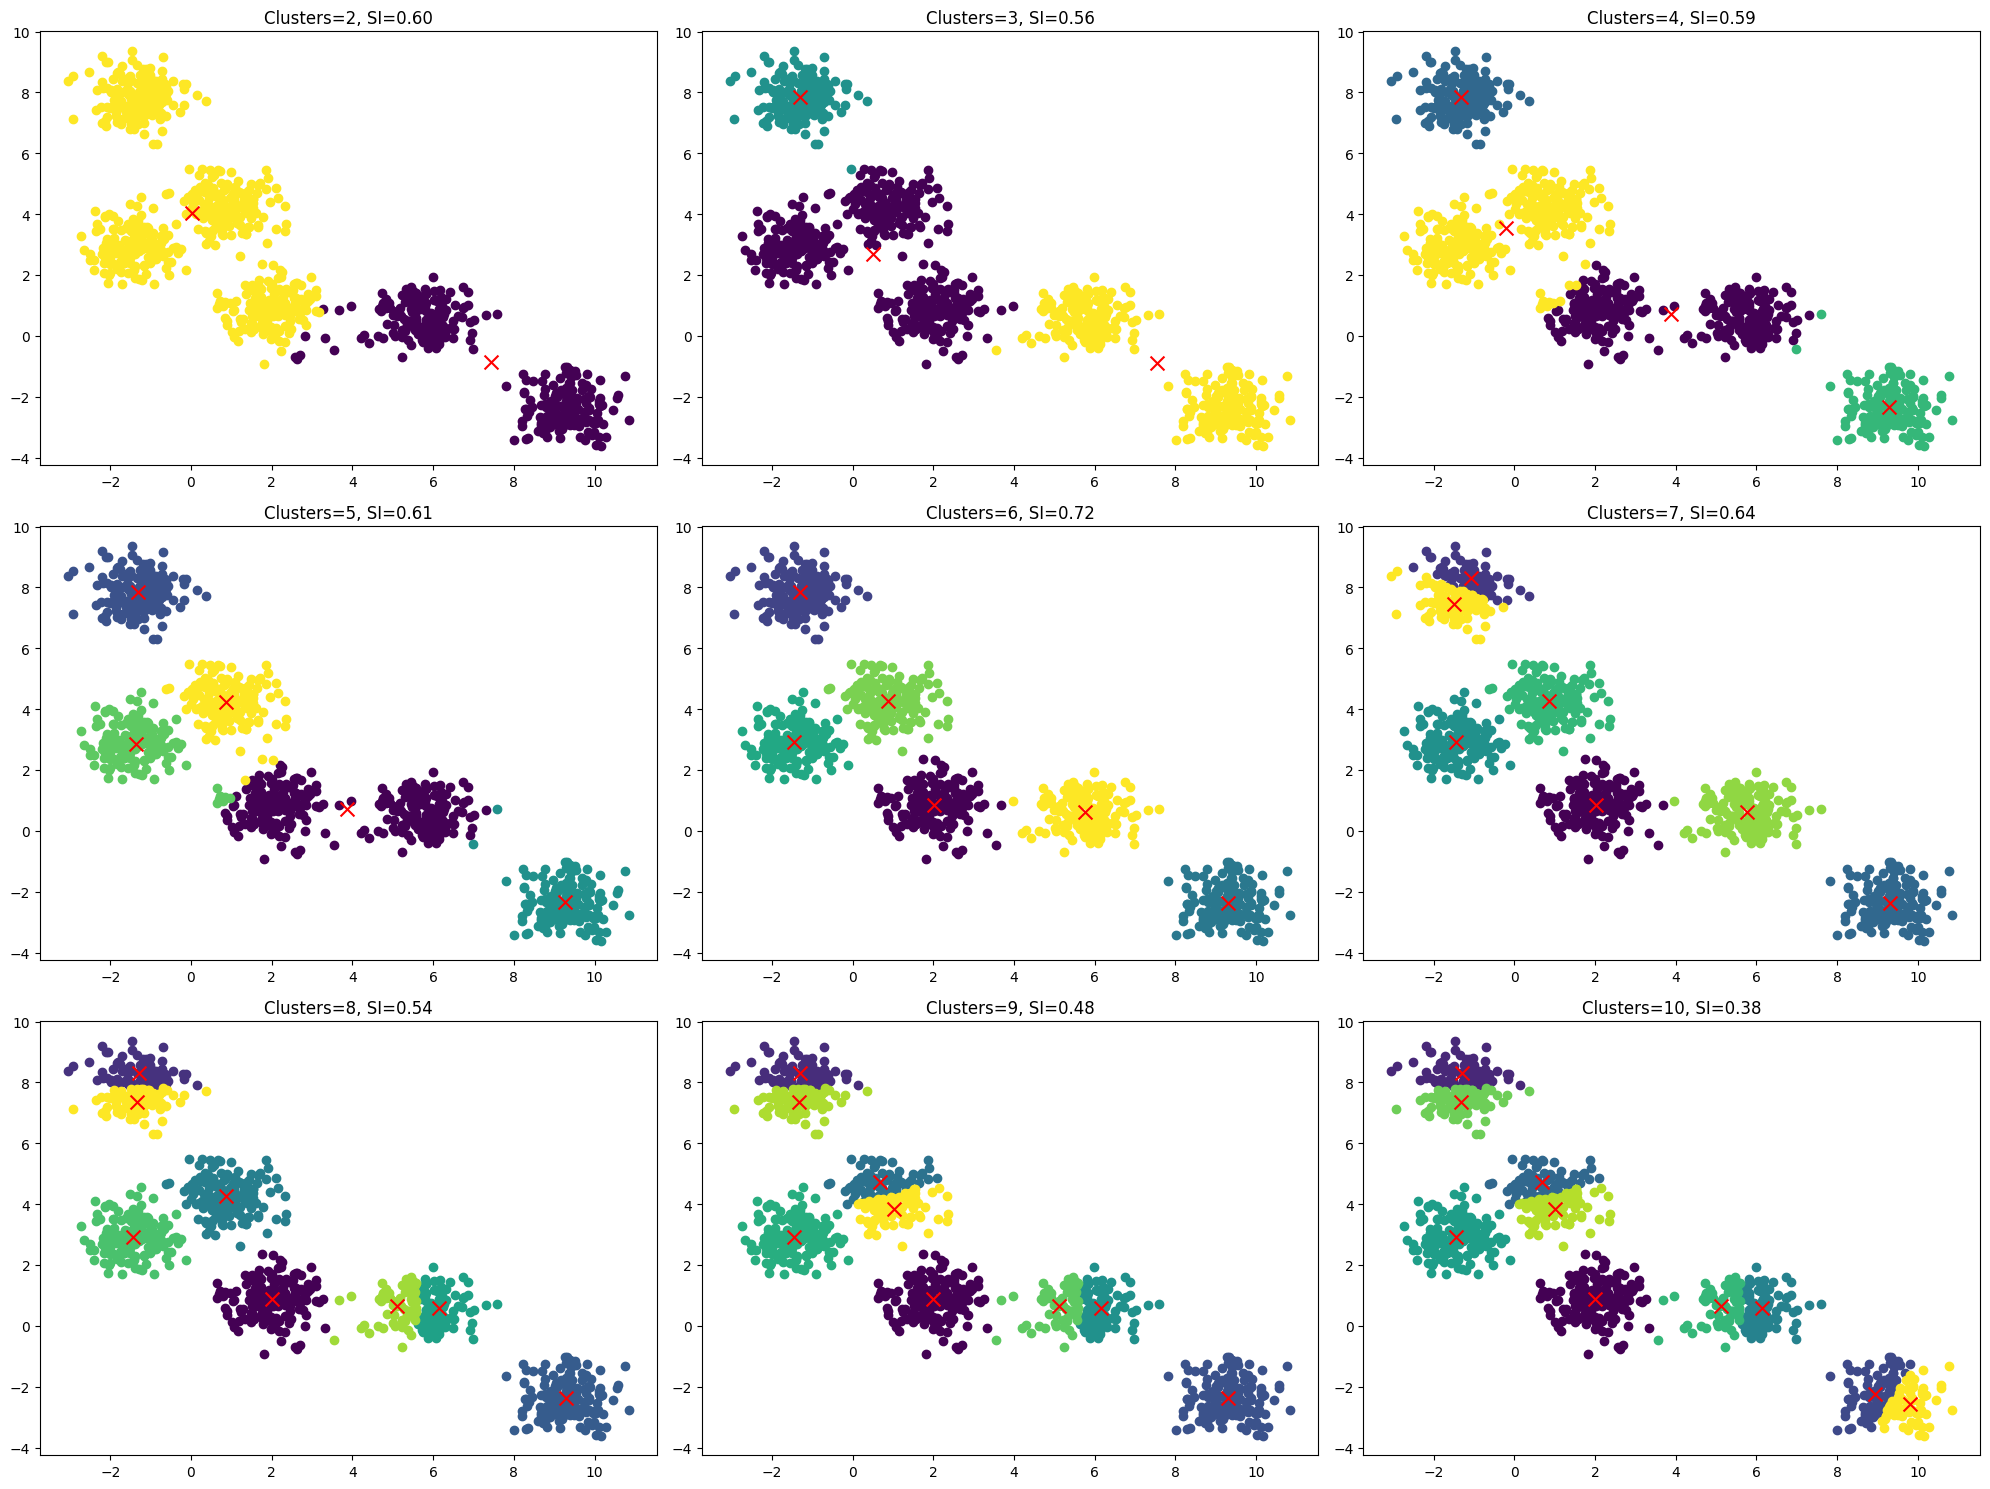

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
a = 0
b = 0
for i in range(2, 11):
    cmap = plt.cm.get_cmap('viridis', i)
    colors = [cmap(j) for j in range(i)] 
    
    k1 = KMeans(n_clusters=i, init='k-means++',max_iter=300, random_state=42)
    k1.fit(x_train)
    y1 = k1.predict(x_test)
    labels_train = k1.labels_ 
    
    
    if len(np.unique(y1)) > 1:
        si = silhouette_score(x_test, y1)
    else:
        si = None
    
    centroids = k1.cluster_centers_
    
    for cluster in range(i):
        mask = (labels_train == cluster)
        axes[a, b].scatter(x_train[mask, 0], x_train[mask, 1], color=colors[cluster], label=f'Cluster {cluster}')
    
    
    axes[a, b].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
    axes[a, b].set_title(f"Clusters={i}, SI={si:.2f}" if si else f"Clusters={i} (SI=NaN)")
    
    
    b += 1
    if b > 2:
        a += 1
        b = 0
    if a > 2: 
        break

plt.tight_layout()
plt.show()

In [14]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 25.848595085973557
2 : 8.193310166710244
3 : 4.462028489803938
4 : 2.4626088592796322
5 : 1.29733430868097
6 : 0.6766132512970174
7 : 0.6401392045894403
8 : 0.6070113457018842
9 : 0.5712958139312122


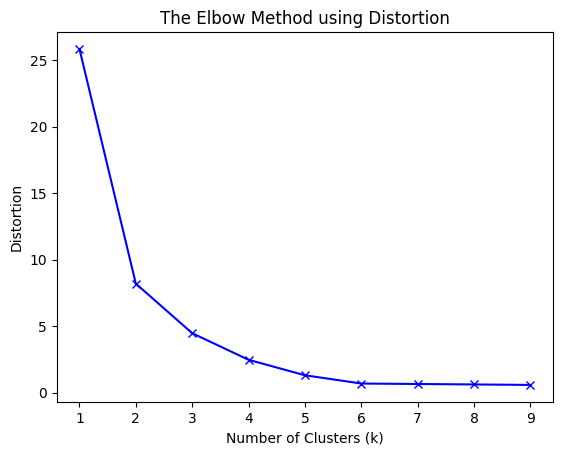

In [16]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## The elbow point and the visualization of clusters show that K=6 gives the best cluster

## Now Lets use DBSCAN on this Dataset 


In [18]:
from sklearn.cluster import DBSCAN

In [24]:
eps_values = (0.2,0.4,0.8,1,2,3)
min_samples_values = range(3, 10)

best_score = -1
best_params = {}

# Manual grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        
        # Exclude noise points for scoring
        if len(set(labels)) > 1 and np.any(labels != -1):
            mask = labels != -1
            try:
                score = silhouette_score(X[mask], labels[mask])
                print(f"eps={eps:.2f}, min_samples={min_samples} => Silhouette Score: {score:.4f}")
                
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
            except:
                continue

print(" Best Parameters:")
print(best_params)
print(f" Best Silhouette Score: {best_score:.4f}")

eps=0.20, min_samples=3 => Silhouette Score: 0.0387
eps=0.20, min_samples=4 => Silhouette Score: 0.0802
eps=0.20, min_samples=5 => Silhouette Score: 0.1296
eps=0.20, min_samples=6 => Silhouette Score: 0.2238
eps=0.20, min_samples=7 => Silhouette Score: 0.3837
eps=0.20, min_samples=8 => Silhouette Score: 0.3068
eps=0.20, min_samples=9 => Silhouette Score: 0.4189
eps=0.40, min_samples=3 => Silhouette Score: 0.6435
eps=0.40, min_samples=4 => Silhouette Score: 0.7046
eps=0.40, min_samples=5 => Silhouette Score: 0.7076
eps=0.40, min_samples=6 => Silhouette Score: 0.7103
eps=0.40, min_samples=7 => Silhouette Score: 0.7140
eps=0.40, min_samples=8 => Silhouette Score: 0.7147
eps=0.40, min_samples=9 => Silhouette Score: 0.7168
eps=0.80, min_samples=3 => Silhouette Score: 0.4464
eps=0.80, min_samples=4 => Silhouette Score: 0.4464
eps=0.80, min_samples=5 => Silhouette Score: 0.4464
eps=0.80, min_samples=6 => Silhouette Score: 0.4464
eps=0.80, min_samples=7 => Silhouette Score: 0.4464
eps=0.80, mi

Silhouette Score (excluding noise): 0.717


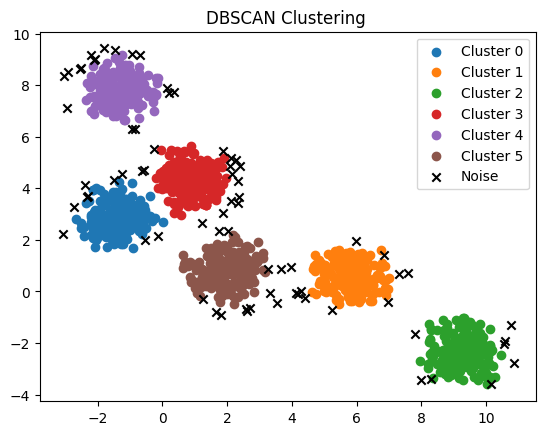

In [22]:
db = DBSCAN(eps=0.4, min_samples=9)
labels = db.fit_predict(X)

# Remove noise for silhouette score
mask = labels != -1
if len(set(labels[mask])) > 1:  # silhouette_score needs at least 2 clusters
    score = silhouette_score(X[mask], labels[mask])
    print(f"Silhouette Score (excluding noise): {score:.3f}")
else:
    print("Not enough clusters to compute silhouette score.")

# Unique labels
unique_labels = set(labels)

# Colormap
cmap = plt.colormaps.get_cmap('tab10')

# Plotting
for idx, k in enumerate(unique_labels):
    cluster_mask = (labels == k)
    xy = X[cluster_mask]
    if k == -1:
        plt.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', label='Noise')
    else:
        plt.scatter(xy[:, 0], xy[:, 1], color=cmap(idx % 10), label=f'Cluster {k}')

plt.legend()
plt.title('DBSCAN Clustering ')
plt.show()

## From this file we can conclude that k means works nicely for spherical data and DBSCAN Also worked Good for spherical data